# Vessel Fuel Consumption Model Development


# Importing Libraries


In [1]:
# Importing Libraries
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [3]:
%matplotlib inline

# Reading Dataset


In [4]:
# Load the dataset
def load_data(file_path):
    """Load dataset and handle potential errors."""
    try:
        data = pd.read_csv(file_path)
        return data
    except FileNotFoundError:
        print("Error: File not found.")
        raise
    except pd.errors.EmptyDataError:
        print("Error: No data in file.")
        raise
    except pd.errors.ParserError:
        print("Error: Error parsing the file.")
        raise

In [5]:
data=load_data('vessel_data_2years.csv')

Dataset loaded into a DataFrame named 'data'.

# Analyzing Data

In [6]:
data.head(5)

,Date,Speed,MainEngine_Consumption,AuxEngine_Consumption,Cargo_Load,Sea_State,Wind_Speed,Season,Seasonal_Factor,Total_Consumption
0,1/1/2022,15.01,39.30,4.13,0.83,3,29.73,1,1.1,65.43
1,1/2/2022,11.48,38.50,5.21,0.67,2,25.78,1,1.1,49.43
2,1/3/2022,17.60,42.60,4.37,0.52,8,19.23,1,1.1,86.11
3,1/4/2022,11.93,43.98,6.16,0.56,2,4.17,1,1.1,55.70
4,1/5/2022,15.61,42.38,4.05,0.94,0,7.11,1,1.1,64.80


In [7]:
# Display the dimensions of the dataset
data.shape

(730, 10)

The dataset contains 730 rows and 10 columns.

In [8]:
# Display a concise summary of the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    730 non-null    object 
 1   Speed                   730 non-null    float64
 2   MainEngine_Consumption  730 non-null    float64
 3   AuxEngine_Consumption   730 non-null    float64
 4   Cargo_Load              730 non-null    float64
 5   Sea_State               730 non-null    int64  
 6   Wind_Speed              730 non-null    float64
 7   Season                  730 non-null    int64  
 8   Seasonal_Factor         730 non-null    float64
 9   Total_Consumption       730 non-null    float64
dtypes: float64(7), int64(2), object(1)
memory usage: 57.2+ KB


In [9]:
# Provides mean, standard deviation, minimum, maximum, and quartiles for numeric columns
data.describe()

,Speed,MainEngine_Consumption,AuxEngine_Consumption,Cargo_Load,Sea_State,Wind_Speed,Season,Seasonal_Factor,Total_Consumption
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,14.013932,39.780356,5.012808,0.758726,3.964384,14.564781,2.504110,0.999452,58.474932
std,1.939821,4.983717,0.992649,0.144786,2.561473,8.860694,1.115109,0.070660,14.183853
min,6.240000,25.930000,1.970000,0.500000,0.000000,0.020000,1.000000,0.900000,0.360000
25%,12.712500,36.372500,4.340000,0.632500,2.000000,6.540000,2.000000,0.900000,50.057500
50%,14.060000,39.915000,5.030000,0.760000,4.000000,14.320000,3.000000,1.000000,58.185000
75%,15.160000,43.227500,5.670000,0.880000,6.000000,22.110000,3.000000,1.000000,66.965000
max,19.460000,55.880000,7.610000,1.000000,8.000000,29.970000,4.000000,1.100000,100.340000


In [10]:
#checking whether there is any null value or not
data.isnull()

,Date,Speed,MainEngine_Consumption,AuxEngine_Consumption,Cargo_Load,Sea_State,Wind_Speed,Season,Seasonal_Factor,Total_Consumption
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
725,False,False,False,False,False,False,False,False,False,False
726,False,False,False,False,False,False,False,False,False,False
727,False,False,False,False,False,False,False,False,False,False
728,False,False,False,False,False,False,False,False,False,False


In [11]:
# Count the number of missing (null) values in each column
data.isnull().sum()

Date                      0
Speed                     0
MainEngine_Consumption    0
AuxEngine_Consumption     0
Cargo_Load                0
Sea_State                 0
Wind_Speed                0
Season                    0
Seasonal_Factor           0
Total_Consumption         0
dtype: int64

No null values are present in the DataFrame, so no need to perform any null value handling techniques


In [12]:
# Check for duplicate rows in the DataFrame
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
725    False
726    False
727    False
728    False
729    False
Length: 730, dtype: bool

No Duplicate values are present in the DataFrame, so no need to perform any duplicate value handling techniques

In [13]:
# Print the list of column names in the DataFrame
# Converts the column index to a list and prints it
print(data.columns.tolist())

['Date', 'Speed', 'MainEngine_Consumption', 'AuxEngine_Consumption', 'Cargo_Load', 'Sea_State', 'Wind_Speed', 'Season', 'Seasonal_Factor', 'Total_Consumption']


In [14]:
#displaying the heat-map of correlation among each columns
# Correlation matrix
correlation_matrix = data.corr()


C:\Users\bhask\AppData\Local\Temp\ipykernel_21564\1825325008.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


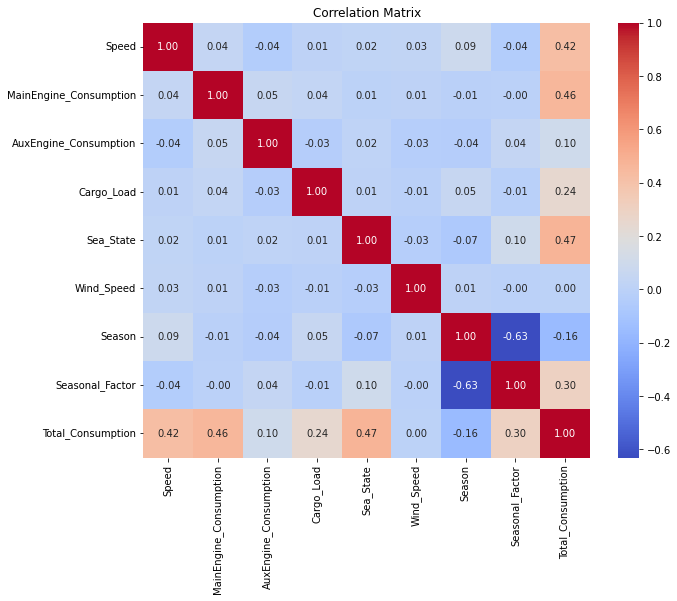

In [15]:
# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


The heatmap shows the correlation between different features in dataset, with colors representing the strength and direction of the relationships.

In [16]:
# Drop the 'Date' column as it's not numerically relevant
data = data.drop(columns=['Date'])

In [17]:
# From the correlation matrix, we find that 'AuxEngine_Consumption' is not correlated with 'Total_Consumption'
# Therefore, we will drop the 'AuxEngine_Consumption' column from the DataFrame
data = data.drop(columns=['AuxEngine_Consumption'])

In [18]:
# From the correlation matrix, we find that 'Wind_Speed' is not correlated with 'Total_Consumption'
# Therefore, we will drop the 'Wind_Speed' column from the DataFrame

data = data.drop(columns=['Wind_Speed'])




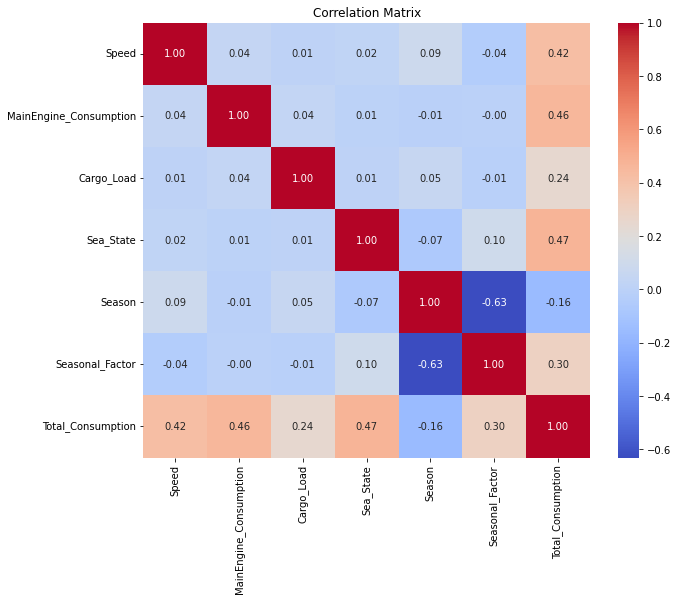

In [19]:
# Visualize the correlation matrix after droping few Columns

correlation_matrix_ = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


# DATA VISUALIZATION

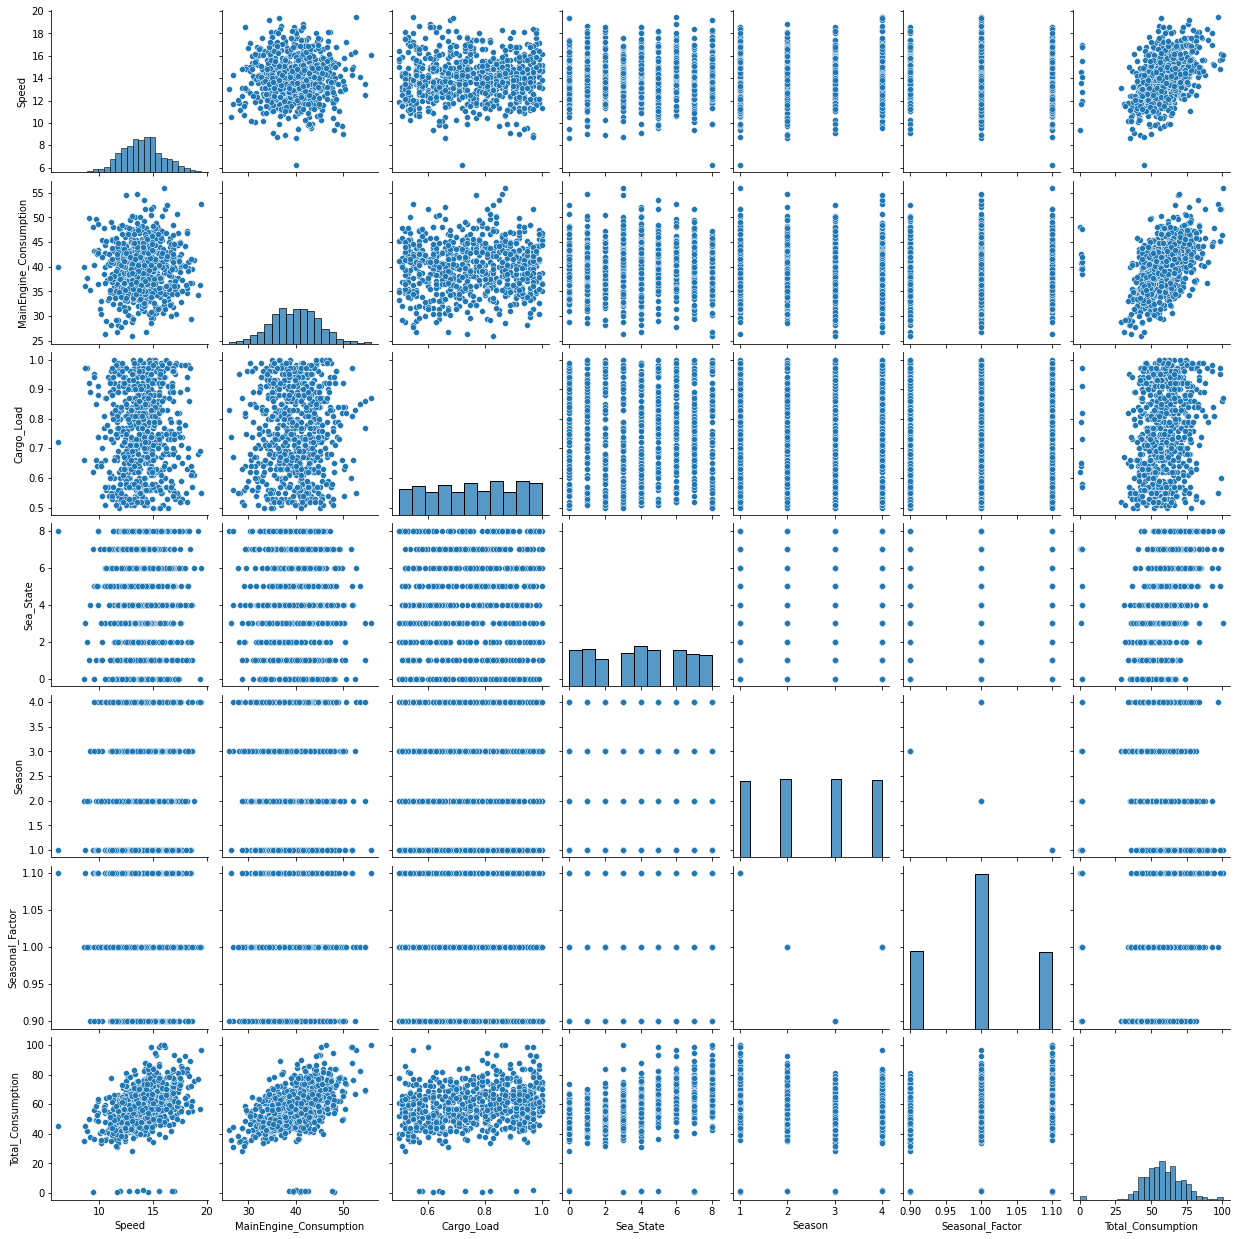

In [20]:
# Pairplot for visualizing relationships between variables
sns.pairplot(data)
plt.show()

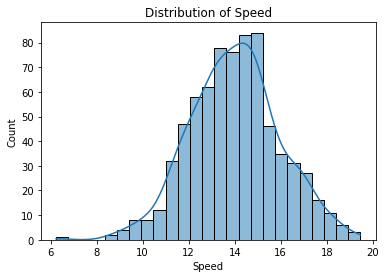

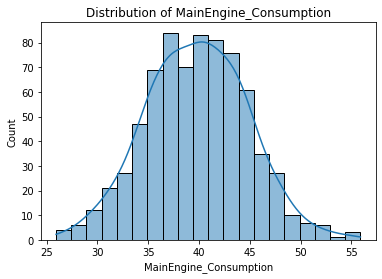

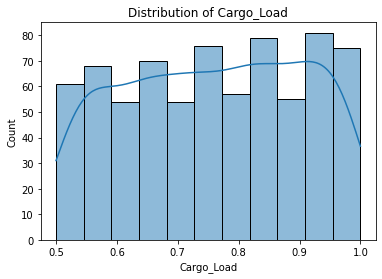

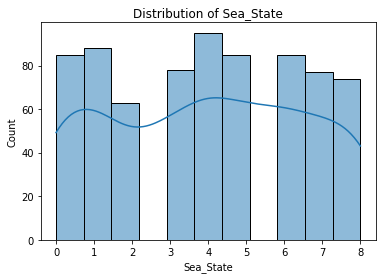

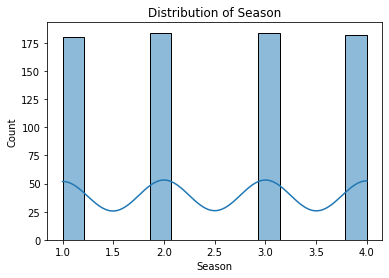

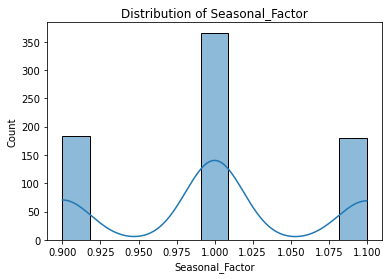

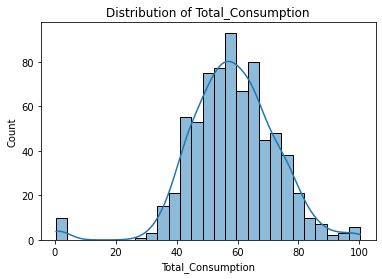

In [21]:
# Distribution plots for each feature
for column in data.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure()
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

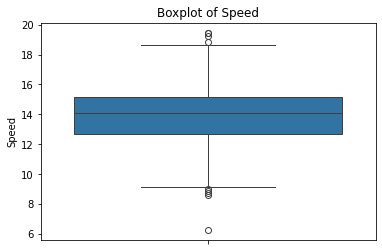

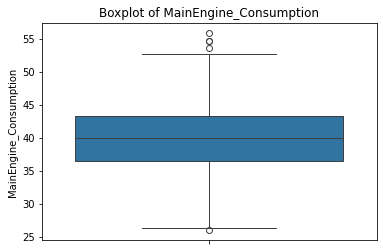

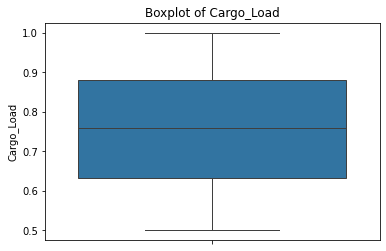

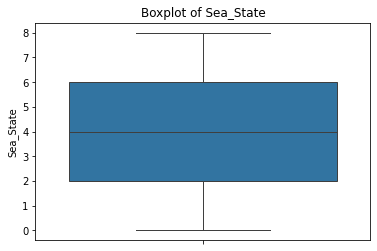

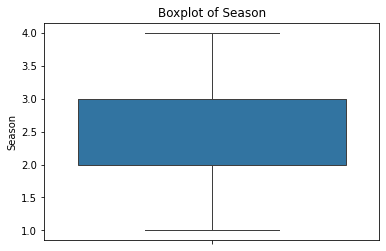

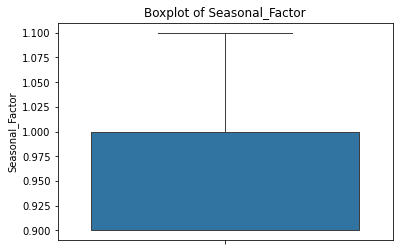

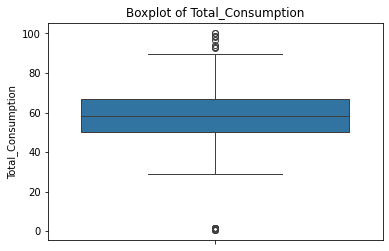

In [22]:
# Boxplots to detect outliers
for column in data.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure()
    sns.boxplot(data[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

In [23]:
print(data.columns.tolist())

['Speed', 'MainEngine_Consumption', 'Cargo_Load', 'Sea_State', 'Season', 'Seasonal_Factor', 'Total_Consumption']


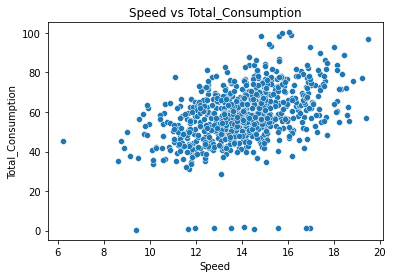

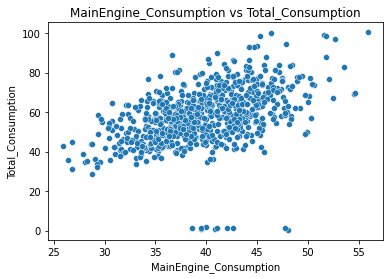

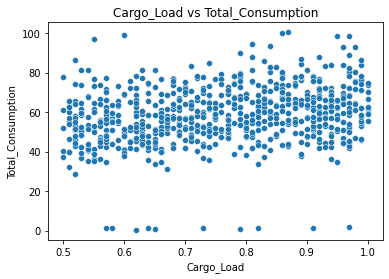

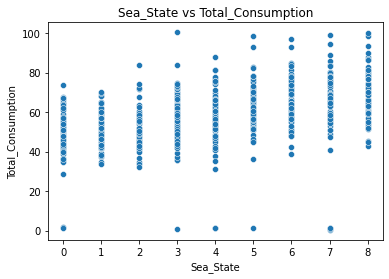

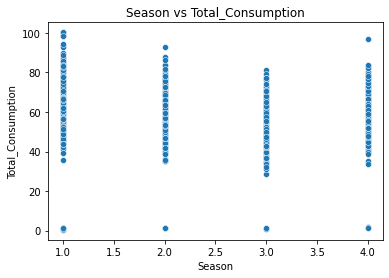

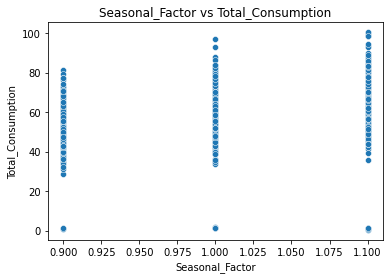

In [24]:
# Scatter plots for relevant features against the target variable
target = 'Total_Consumption'  # Target variable
for column in ['Speed', 'MainEngine_Consumption', 'Cargo_Load','Sea_State','Season','Seasonal_Factor']:
    plt.figure()
    sns.scatterplot(x=data[column], y=data[target])
    plt.title(f'{column} vs {target}')
    plt.show()

# DATA CLEANING

OUTLIERS AND OUTLIERS TREATMENT

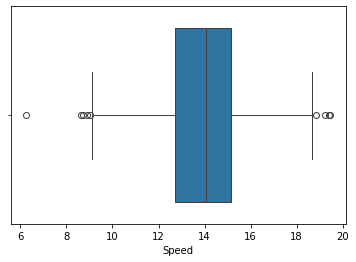

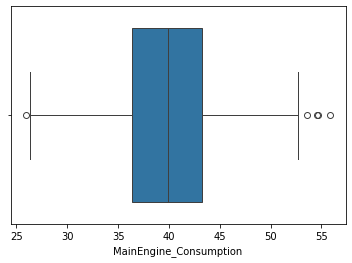

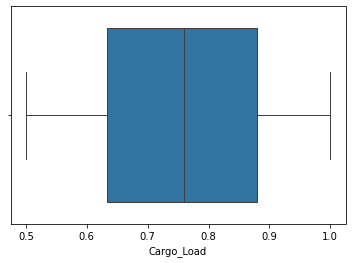

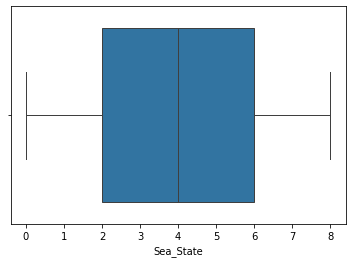

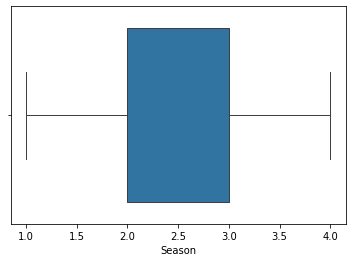

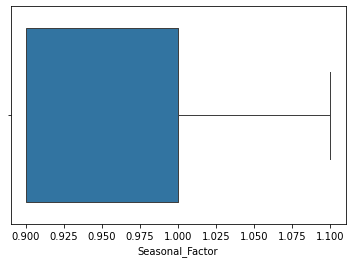

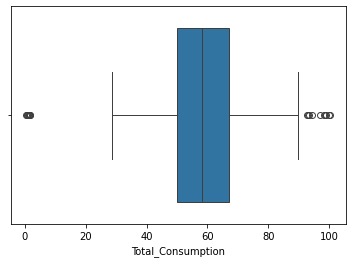

In [25]:
# Checking for the outliers
# Boxplot to identify the outlier in data
import warnings
warnings.filterwarnings("ignore")
for i in data.select_dtypes(include="number").columns:
    sns.boxplot(data=data,x=i)
    plt.show()

In [26]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Define the threshold for outliers
threshold = 1.5

# Initialize a dictionary to store the number of outliers in each column
outlier_counts = {}

# Create an empty set to collect outlier indices
outlier_indices = set()

# Determine the number of outliers for each column
for column in data.columns:
    is_outlier = (data[column] < (Q1[column] - threshold * IQR[column])) | (data[column] > (Q3[column] + threshold * IQR[column]))
    outlier_counts[column] = is_outlier.sum()
    outlier_indices.update(data.index[is_outlier])
    

# Print the number of outliers in each column
for column, count in outlier_counts.items():
    print(f"Number of outliers in column '{column}': {count}")

Number of outliers in column 'Speed': 9
Number of outliers in column 'MainEngine_Consumption': 5
Number of outliers in column 'Cargo_Load': 0
Number of outliers in column 'Sea_State': 0
Number of outliers in column 'Season': 0
Number of outliers in column 'Seasonal_Factor': 0
Number of outliers in column 'Total_Consumption': 20


The output indicates the number of outliers in each specified column, with 'Speed', 'MainEngine_Consumption', and 'Total_Consumption' having outliers, while other columns have none.

In [27]:
# Convert the set of outlier indices to a list
outlier_indices = list(outlier_indices)

# Remove the rows with outlier indices
cleaned_data = data.drop(index=outlier_indices)

# Display the number of rows before and after removing outliers
print(f"Number of rows before removing outliers: {len(data)}")
print(f"Number of rows after removing outliers: {len(cleaned_data)}")

Number of rows before removing outliers: 730
Number of rows after removing outliers: 698


This output shows that there were 730 rows initially, and after removing outliers, the number of rows decreased to 698.

In [28]:
# Recalculate the quantiles and IQR on the cleaned_data
Q1_cleaned = cleaned_data.quantile(0.25)
Q3_cleaned = cleaned_data.quantile(0.75)
IQR_cleaned = Q3_cleaned - Q1_cleaned

# Determine outliers for each column in cleaned_data
remaining_outliers = {}

for column in cleaned_data.columns:
    is_outlier_cleaned = (cleaned_data[column] < (Q1_cleaned[column] - threshold * IQR_cleaned[column])) | (cleaned_data[column] > (Q3_cleaned[column] + threshold * IQR_cleaned[column]))
    remaining_outliers[column] = cleaned_data[is_outlier_cleaned]

# Display the number of outliers remaining in each column
for column, data in remaining_outliers.items():
    num_outliers = len(data)
    print(f"Number of remaining outliers in column '{column}': {num_outliers}")


Number of remaining outliers in column 'Speed': 2
Number of remaining outliers in column 'MainEngine_Consumption': 0
Number of remaining outliers in column 'Cargo_Load': 0
Number of remaining outliers in column 'Sea_State': 0
Number of remaining outliers in column 'Season': 0
Number of remaining outliers in column 'Seasonal_Factor': 0
Number of remaining outliers in column 'Total_Consumption': 0


We see that outliers have been removed, so we can now proceed with the analysis.

In [29]:
#Visualizing dataset after removing outliers
cleaned_data.head()

,Speed,MainEngine_Consumption,Cargo_Load,Sea_State,Season,Seasonal_Factor,Total_Consumption
0,15.01,39.30,0.83,3,1,1.1,65.43
1,11.48,38.50,0.67,2,1,1.1,49.43
2,17.60,42.60,0.52,8,1,1.1,86.11
3,11.93,43.98,0.56,2,1,1.1,55.70
4,15.61,42.38,0.94,0,1,1.1,64.80


In [30]:
# Initialize the StandardScaler
# This scaler will standardize features by removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


Seperaating Features as well as Target column for data Training

In [31]:
# Extract the 'Total_Consumption' column from the cleaned_data DataFrame
# This column will serve as the target variable for our model
Target_col=cleaned_data['Total_Consumption']

In [32]:
# Create the feature columns by dropping the 'Total_Consumption' column from the cleaned_data DataFrame
# The remaining columns will be used as features for the model
Features_col=cleaned_data.drop(columns=['Total_Consumption'])

In [33]:
# Standardize the feature columns using StandardScaler
New_Features = scaler.fit_transform(Features_col)

# Convert New_Features back to a DataFrame to inspect
New_Features_df = pd.DataFrame(New_Features, columns=Features_col.columns)



In [34]:
Target_col.info()

<class 'pandas.core.series.Series'>
Int64Index: 698 entries, 0 to 729
Series name: Total_Consumption
Non-Null Count  Dtype  
--------------  -----  
698 non-null    float64
dtypes: float64(1)
memory usage: 10.9 KB


In [35]:
# Display the first 5 rows of the standardized features DataFrame
# This helps in verifying the transformation and ensuring the standardization process is correctly applied
New_Features_df.head(5)


,Speed,MainEngine_Consumption,Cargo_Load,Sea_State,Season,Seasonal_Factor
0,0.544062,-0.059273,0.501244,-0.364641,-1.375102,1.449436
1,-1.372360,-0.226258,-0.603531,-0.757419,-1.375102,1.449436
2,1.950162,0.629540,-1.639258,1.599245,-1.375102,1.449436
3,-1.128057,0.917590,-1.363064,-0.757419,-1.375102,1.449436
4,0.869800,0.583620,1.260778,-1.542973,-1.375102,1.449436


# Training Model

In [36]:
# Import train_test_split for splitting the dataset into training and testing sets
# Import mean_absolute_error, mean_squared_error, and r2_score for evaluating model performance
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [37]:
#Choosing training data to be 30% and rest as our testing data
x_train, x_test, y_train, y_test = train_test_split(New_Features_df, Target_col, test_size=0.3, random_state=101)

# Random Forest 

In [38]:
# Import RandomForestRegressor for building a regression model using an ensemble of decision trees
# This model will be used for predicting continuous target variables based on the features

from sklearn.ensemble import RandomForestRegressor

In [39]:

# Initialize RandomForestRegressor with a fixed random_state for reproducibility
rf = RandomForestRegressor(random_state=101)

In [40]:
# Train the RandomForestRegressor model on the training data
rf.fit(x_train, y_train)

RandomForestRegressor(random_state=101)

In [41]:
# Make predictions
y_pred_rf = rf.predict(x_test)

In [42]:
# Calculate and print the Mean Absolute Error (MAE) to evaluate the performance of the RandomForestRegressor model
# MAE measures the average magnitude of errors in predictions, providing an indication of how close the predictions are to the actual values
mae = mean_absolute_error(y_test, y_pred_rf)
print(f"Mean Absolute Error (MAE): {mae:.4f}")


Mean Absolute Error (MAE): 2.8655


In [43]:
# Calculate and print the Mean Squared Error (MSE) to evaluate the performance of the RandomForestRegressor model
# MSE measures the average of the squares of the errors, providing an indication of how well the model's predictions match the actual values

mse = mean_squared_error(y_test, y_pred_rf)
print(f"Mean Squared Error (MSE): {mse:.4f}")


Mean Squared Error (MSE): 12.9575


In [44]:
# Calculate and print the Root Mean Squared Error (RMSE) to evaluate the performance of the RandomForestRegressor model
# RMSE is the square root of MSE and provides an indication of the average magnitude of prediction errors, in the same units as the target variable

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")


Root Mean Squared Error (RMSE): 3.5997


In [45]:
# Calculate and print the R² Score to evaluate the performance of the RandomForestRegressor model
# R² Score indicates the proportion of variance in the target variable that is predictable from the feature variables

r2 = r2_score(y_test, y_pred_rf)
print(f"R² Score: {r2:.4f}")


R² Score: 0.8932


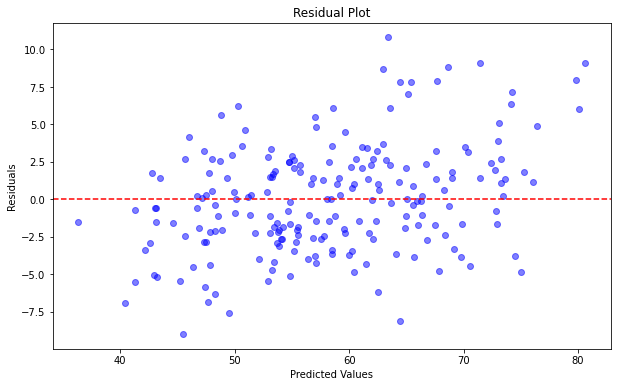

In [46]:
# Plot the residuals to assess the performance of the RandomForestRegressor model
# Residuals are the differences between the actual and predicted values
# A residual plot helps to check for patterns in errors and assess model fit
residuals = y_test - y_pred_rf
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_rf, residuals, alpha=0.5, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


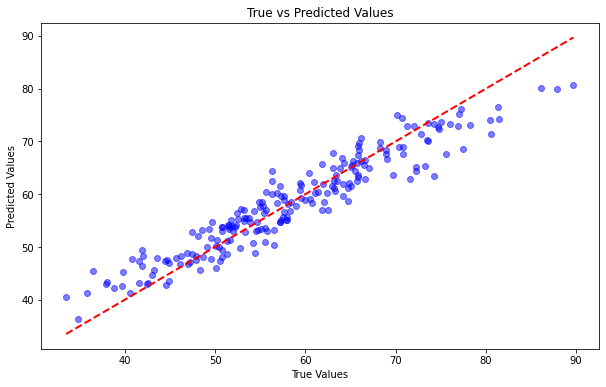

In [47]:
# Optionally: Plot true values vs predicted values to visualize model performance
# A scatter plot where the points are close to the diagonal line indicates better model performance
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5, color='blue')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Diagonal line for reference
plt.show()


In [48]:
# Save the model and scaler
joblib.dump(rf, 'consumption_model.joblib')
joblib.dump(scaler, 'scaler.joblib')

['scaler.joblib']

# LINEAR REGRESSION

In [49]:
# Import LinearRegression to build and train a linear regression model

from sklearn.linear_model import LinearRegression

In [50]:
# Initialize the LinearRegression model
lm = LinearRegression()

In [51]:
# Train the LinearRegression model on the training data
lm.fit(x_train, y_train)

LinearRegression()

In [52]:
# Make predictions
y_pred = lm.predict(x_test)

In [53]:
# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")

Mean Absolute Error (MAE): 1.3792


In [54]:
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.4f}")

Mean Squared Error (MSE): 2.9437


In [55]:
# Calculate Root Mean Squared Error
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

Root Mean Squared Error (RMSE): 1.7157


In [56]:
# Calculate R² Score
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.4f}")

R² Score: 0.9757


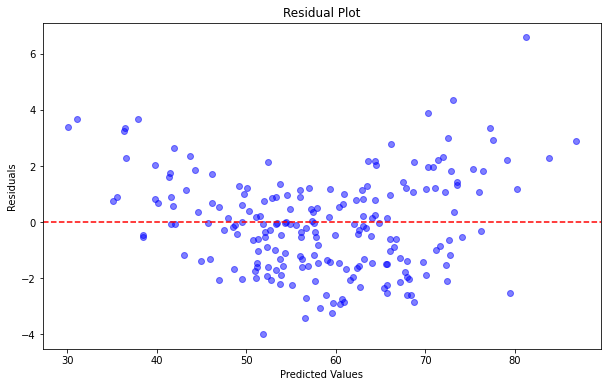

In [57]:
# Plot Residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

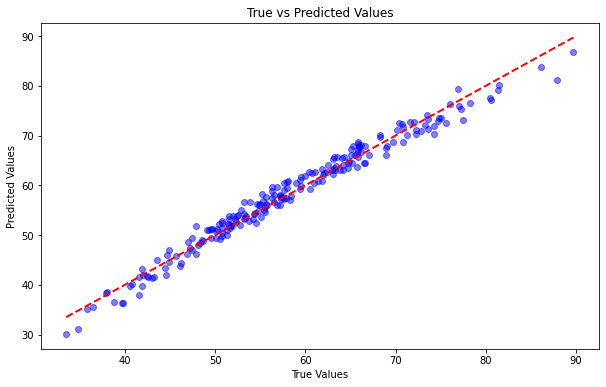

In [58]:
# Optionally: Plot predictions vs true values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.show()

In [59]:
# Save the Linearmodel
joblib.dump(lm, 'Linear_Regression_model.joblib')


['Linear_Regression_model.joblib']

# Model Evaluation and Classification


# 2. EVENT CLASSIFICATION SYSTEM

In [60]:
def classify_event(features, model, scaler, mean_consumption, threshold=10):
    """Classify event based on predicted consumption."""
    try:
        # Scale features and predict consumption using the model
        features_scaled = scaler.transform([features])
        predicted_consumption = model.predict(features_scaled)[0]
        
        # Determine the event classification based on the difference from the mean consumption
        difference = predicted_consumption - mean_consumption
        return "Excess" if difference > threshold else "Under" if difference < -threshold else "Normal"
    except Exception as e:
        print(f"Error during event classification: {e}")
        raise

In [61]:
# Calculate mean consumption from the training data
mean_consumption = y_train.mean()

# New event features without 'Total_Consumption'
# Columns used in new_event: ['Speed', 'MainEngine_Consumption', 'Cargo_Load', 'Sea_State', 'Season', 'Seasonal_Factor']
new_event = [15, 20, 30, 40, 10, 1]   # Replace with actual values

# Classify the new event
classification = classify_event(new_event, rf, scaler, mean_consumption)
print(f"Classification of the new event: {classification}")

Classification of the new event: Normal


In [62]:
# Define thresholds for sea state and wind speed
def classify_weather(sea_state, wind_speed):
    # Sea State Classification
    if sea_state <= 2:  # 25th percentile
        sea_state_class = 'calm'
    elif sea_state <= 4:  # 50th percentile
        sea_state_class = 'moderate'
    else:
        sea_state_class = 'rough'
    
    # Wind Speed Classification
    if wind_speed <= 6.54:  # 25th percentile
        wind_speed_class = 'light'
    elif wind_speed <= 14.32:  # 50th percentile
        wind_speed_class = 'moderate'
    else:
        wind_speed_class = 'strong'
    
    return sea_state_class, wind_speed_class

In [63]:
#Test Cases
# Given values for sea state and wind speed
sea_state = 5
wind_speed = 18.9

# Classify the given sea state and wind speed
sea_state_class, wind_speed_class = classify_weather(sea_state, wind_speed)

# Print the classifications on separate lines
print(f"Sea State: {sea_state}, classified as {sea_state_class}.")
print(f"Wind Speed: {wind_speed} m/s, classified as {wind_speed_class}.")

Sea State: 5, classified as rough.
Wind Speed: 18.9 m/s, classified as strong.


# Periodic Model Re-training and Saving


In [64]:
# Re-train the RandomForestRegressor model with new data
# This function combines existing and new data, scales the features, splits into training and testing sets,
# trains a new model, and saves it along with the scaler for future use
def retrain_model(new_data):
    combined_data = pd.concat([cleaned_data, new_data], ignore_index=True)
    new_features = combined_data.drop(columns=['Total_Consumption'])
    new_target = combined_data['Total_Consumption']
    new_features_scaled = scaler.fit_transform(new_features)
    x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(new_features_scaled, new_target, test_size=0.3, random_state=101)
    rf_new = RandomForestRegressor(random_state=101)
    rf_new.fit(x_train_new, y_train_new)
    joblib.dump(rf_new, 'consumption_model.joblib')
    joblib.dump(scaler, 'scaler.joblib')

# Print statements to confirm that the model and scaler have been saved
# The saved files can be used for future predictions and re-training
print("Model and scaler saved as 'consumption_model.joblib' and 'scaler.joblib'.")
print("Refer to the provided usage examples for classification and re-training.")


Model and scaler saved as 'consumption_model.joblib' and 'scaler.joblib'.
Refer to the provided usage examples for classification and re-training.


In [65]:
def load_model_and_scaler():
    try:
        model = joblib.load('consumption_model.joblib')
        scaler = joblib.load('scaler.joblib')
        return model, scaler
    except FileNotFoundError:
        print("Error: Model or scaler file not found.")
        raise
    except Exception as e:
        print(f"Error loading model or scaler: {e}")
        raise

# MODEL TESTING

In [66]:
# Function to test Random Forest models
def test_models(input_features):
    # Load the models and scaler
    model, scaler = load_model_and_scaler()
    
    # Check if input_features is a list or array-like and ensure it's the right shape
    if not isinstance(input_features, (list, np.ndarray)):
        raise ValueError("Input features should be a list or numpy array.")
    
    input_features = np.array(input_features).reshape(1, -1)
    
    # Standardize the input features
    input_features_scaled = scaler.transform(input_features)
    
    # Predict using the Random Forest model
    rf_model = model  # Using RandomForestRegressor as it's the last model saved
    rf_prediction = rf_model.predict(input_features_scaled)[0]
    
    return rf_prediction

In [67]:
# Example usage
# Columns used in input_features: ['Speed', 'MainEngine_Consumption', 'Cargo_Load', 'Sea_State', 'Season', 'Seasonal_Factor']
input_features = [15, 45, 30, 40, 10, 1]  
rf_prediction = test_models(input_features)

print(f"Total_Consumption as per Random Forest Regressor: {rf_prediction:.2f}")

Total_Consumption as per Random Forest Regressor: 80.31


My Random Forest Regression model is giving a prediction of total fuel consumption as 80.31 units. This estimate is based on the input features and reflects the model's assessment of fuel usage under the specified conditions.